<a href="https://colab.research.google.com/github/abdelom/kaggle/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import re
from google.colab import drive
import time
import warnings
import seaborn as sns
from imblearn.over_sampling import SMOTE # Calibration des echantillons (a faire)
from scipy.sparse import hstack
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV # Calibration des echantillons (a faire)
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
import nltk
import math
import numpy as np 
import pandas as pd 
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import gc
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sn
warnings.filterwarnings("ignore") 
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import SpatialDropout1D, Dropout, MaxPooling1D, Flatten, Input, Dense, Conv1D, BatchNormalization, Add
from tensorflow.keras import layers, Sequential, Model
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from tensorflow.keras.layers import SpatialDropout1D, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.layers import Input, Dense, Conv1D, Add
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from google.colab import files

In [3]:
!kaggle --version
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!cd input_data/
!kaggle competitions download -c msk-redefining-cancer-treatment

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
cp: cannot stat 'kaggle.json': No such file or directory
/bin/bash: line 0: cd: input_data/: No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Cou

## Load cleaned text (PICKLE object)

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive"
infile = open(DATA_PATH+"/clean_text.pkl",'rb')
df_merge = pickle.load(infile)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df_merge.head()

,id,gene,variation,class,text
0,0,FAM58A,Truncating Mutations,1,cyclindependent kinase cdks regulate variety f...
1,1,CBL,W802*,2,abstract background nonsmall cell lung cancer ...
2,2,CBL,Q249E,2,abstract background nonsmall cell lung cancer ...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutation monomeric casitas blineage ...


## Split Dataset : train and test

3321


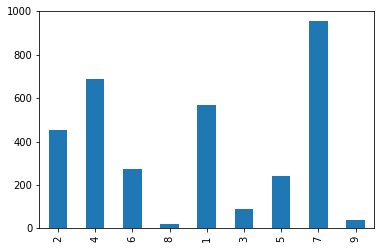

In [7]:
(df_merge['class'].value_counts(sort=False)).plot(kind='bar')
plt.plot()
print(sum(df_merge['class'].value_counts(sort=False)))

## TF-IDF :  term frequency–inverse document frequency
to reflect how important a word is to a document 

- transform words to numeric :  each word in text vocabulary is represented by a numeric number. text -> vector of numerics
- text Vectorisation : convert text to matrix by counting the occurrence of each word in a text.

In [8]:

# vectorizer instantiation
vocabulary_length = 6000
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english', max_features=vocabulary_length, use_idf=True)

# convertir text to matrix
tfidf_wm = tfidfvectorizer.fit_transform(df_merge.text).astype('float64')


#Dimenssion reduction
##TSNE

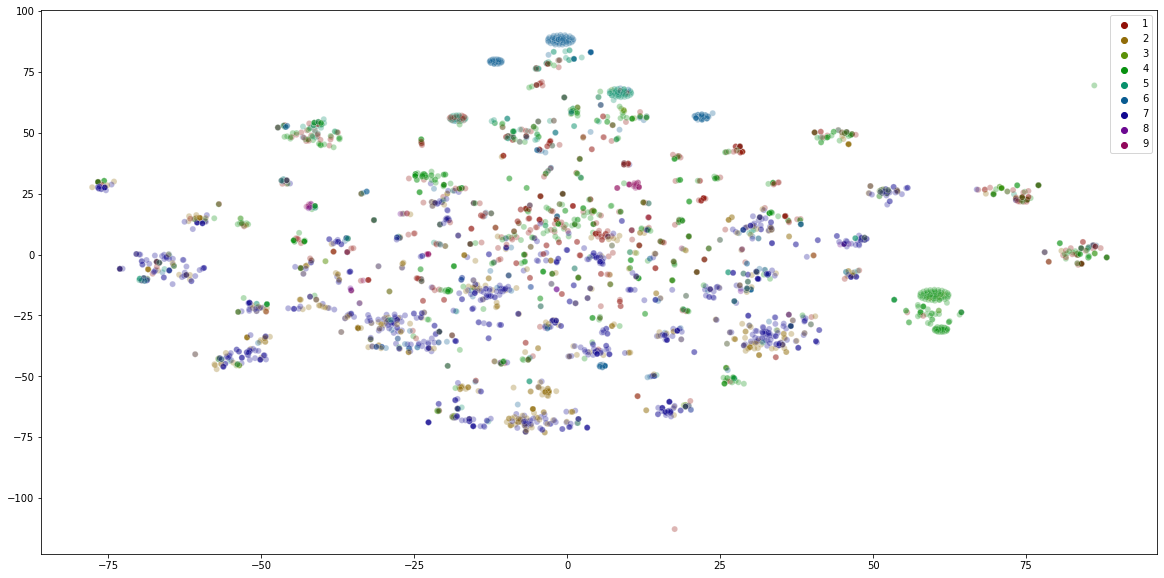

In [9]:
gc.collect()
tfIdfMatrix = tfidf_wm.todense()
labels = df_merge['class'].tolist()
tsne_results = TSNE(n_components=2,init='random',random_state=0).fit_transform(tfIdfMatrix)
plt.figure(figsize=(20,10))
palette = sns.hls_palette(9, l=.3, s=.9)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels,
    palette= palette,
    legend="full",
    alpha=0.3
)
plt.show()

##PCA

In [10]:
gc.collect()
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfidf_wm.toarray())
labels = df_merge['class'].tolist()
category_list = df_merge['class'].unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)  

###First two components's scatter plot

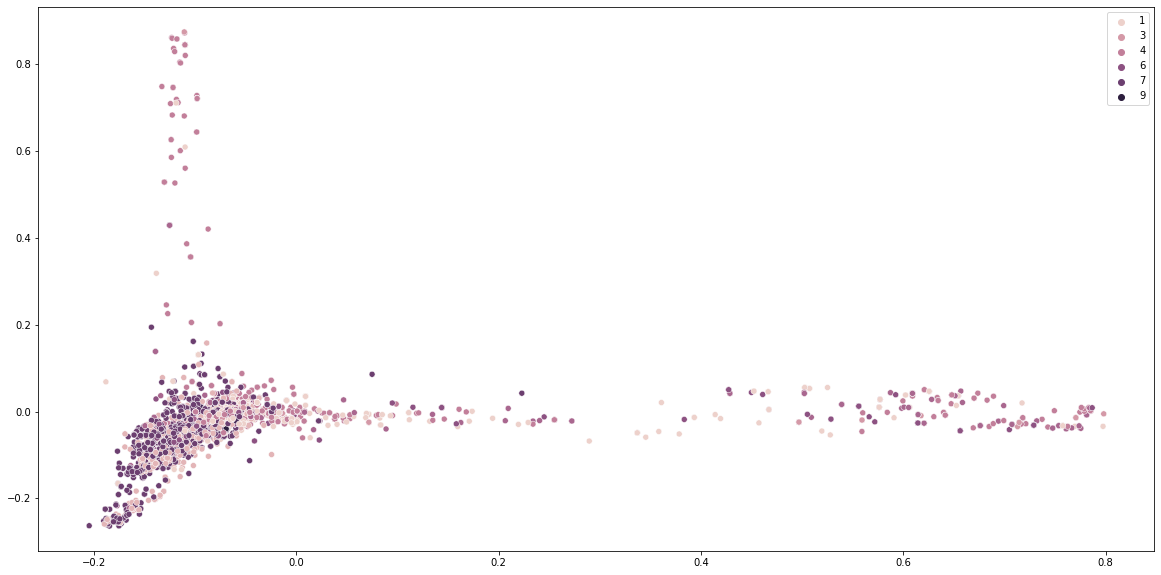

In [11]:
plt.figure(figsize=(20,10))
labels = df_merge['class'].tolist()
sns.scatterplot(x = tfIdfMat_reduced [:,0], y= tfIdfMat_reduced [:,1],
    hue=labels,
    legend="auto"
)

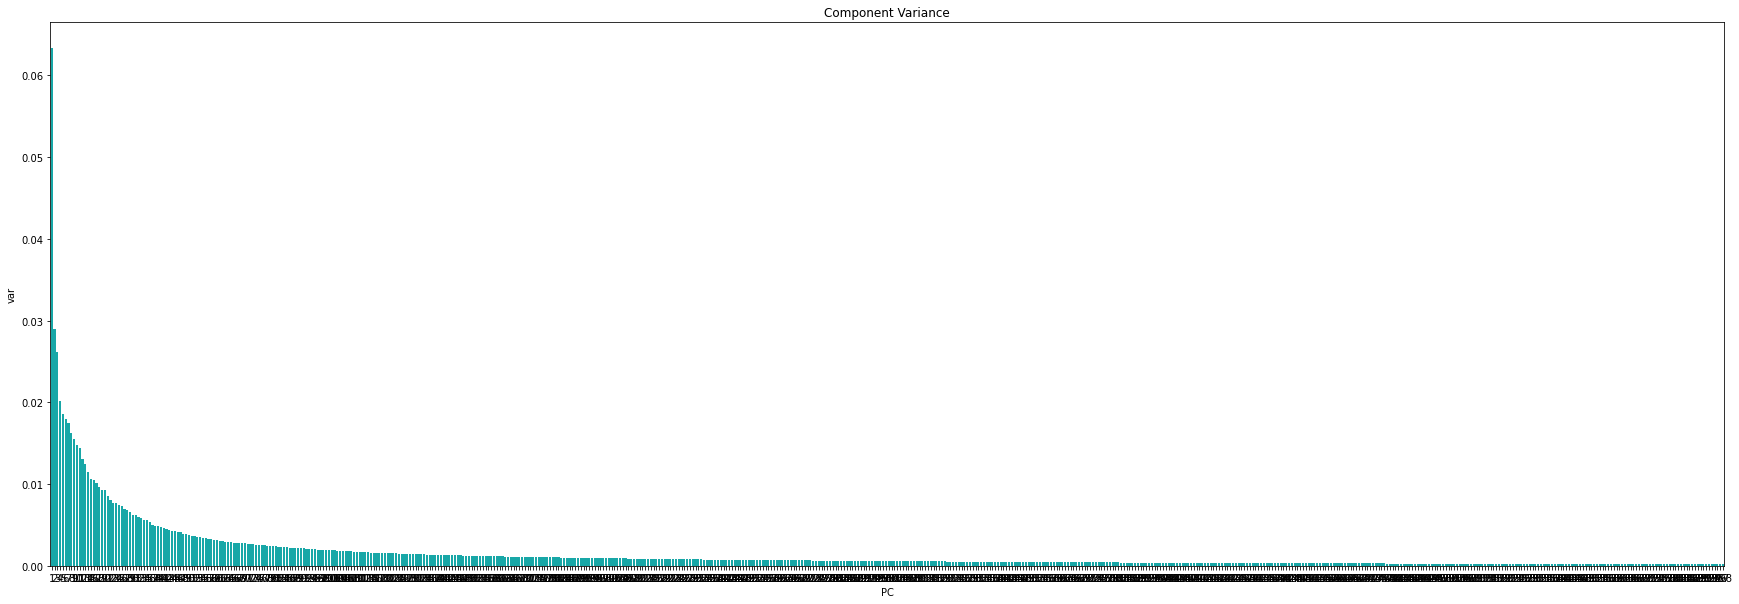

In [12]:
fig = plt.figure(figsize=(30,10))
dfScree = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC': np.arange(1, len(pca.explained_variance_ratio_)+1, step=1)})
sn.barplot(x='PC',y="var",data=dfScree, color="c").set_title('Component Variance');

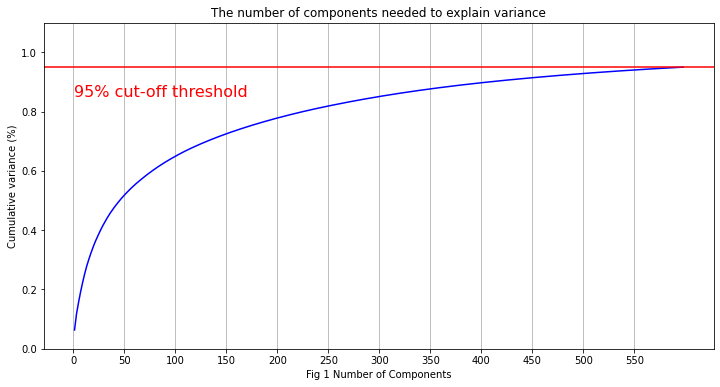

In [15]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1,len(pca.explained_variance_ratio_)+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, linestyle='-', color='b')
plt.xlabel('Fig 1 Number of Components')
plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=50)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

In [14]:
tfIdfMat_reduced.shape

(3321, 598)

##  CNN : convolutional neural network
Sur les données réduites

In [16]:
# y_test = test_y.to_numpy()
y_train2 = [x-1 for x in y_train]
y_test2 = [x-1 for x in y_test]
# Categorical
y_train_cat = to_categorical(y_train2, num_classes=9, dtype ="uint8")
print(y_train_cat[0])
y_test_cat = to_categorical(y_test2, num_classes=9, dtype ="uint8")

[0 0 0 0 0 1 0 0 0]


In [17]:
print(X_train.shape, y_train_cat.shape, X_test.shape, y_test_cat.shape)

(2490, 598) (2490, 9) (831, 598) (831, 9)


In [18]:
X_train.shape[1]

598

# Model
##Simple CNN

In [19]:
input = Input(shape=(X_train.shape[1], 1)) 
x = SpatialDropout1D(0.3)(input)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = Flatten()(x)
out = Dense(9, activation='softmax')(x)
model = Model(input, out)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 598, 1)]          0         
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 598, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 594, 128)          768       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 590, 128)          82048     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 586, 128)          82048     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 582, 128)          82048     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 578, 128)          82048 

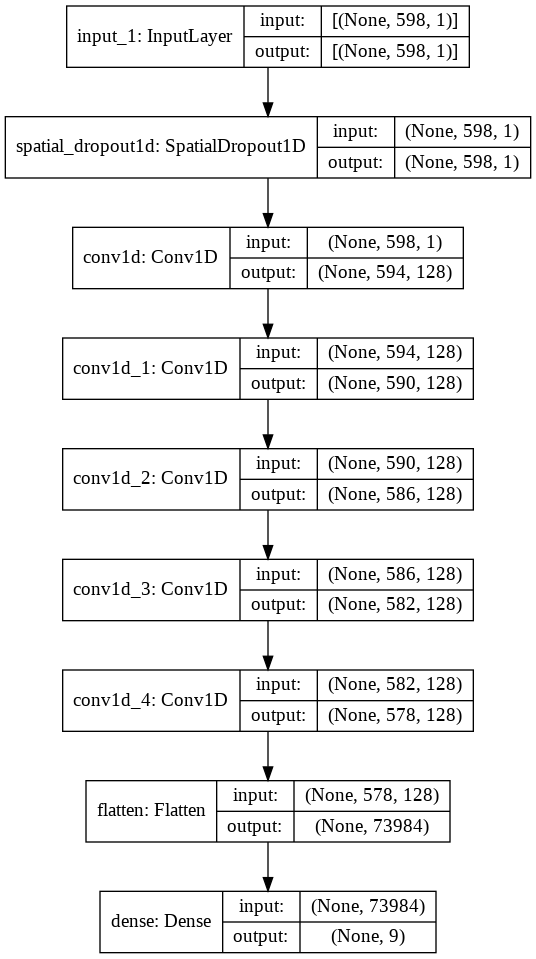

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

In [21]:
history = model.fit(X_train, y_train_cat, batch_size=140, epochs=20, verbose=1, validation_split=0.2,  callbacks = EarlyStopping( monitor = "val_loss" ,patience=10))  # starts trainin

Epoch 1/20
15/15 [==============================] - 34s 208ms/step - loss: 1.9448 - accuracy: 0.2374 - val_loss: 1.8683 - val_accuracy: 0.2851
Epoch 2/20
15/15 [==============================] - 2s 165ms/step - loss: 1.8527 - accuracy: 0.2877 - val_loss: 1.8455 - val_accuracy: 0.2851
Epoch 3/20
15/15 [==============================] - 2s 165ms/step - loss: 1.8310 - accuracy: 0.2897 - val_loss: 1.7847 - val_accuracy: 0.2932
Epoch 4/20
15/15 [==============================] - 2s 166ms/step - loss: 1.7905 - accuracy: 0.3138 - val_loss: 1.7565 - val_accuracy: 0.2972
Epoch 5/20
15/15 [==============================] - 2s 165ms/step - loss: 1.7403 - accuracy: 0.3203 - val_loss: 1.7349 - val_accuracy: 0.3233
Epoch 6/20
15/15 [==============================] - 2s 165ms/step - loss: 1.6757 - accuracy: 0.3529 - val_loss: 1.6148 - val_accuracy: 0.4056
Epoch 7/20
15/15 [==============================] - 2s 166ms/step - loss: 1.5831 - accuracy: 0.3745 - val_loss: 1.5245 - val_accuracy: 0.4779
Epoch

<function matplotlib.pyplot.show>

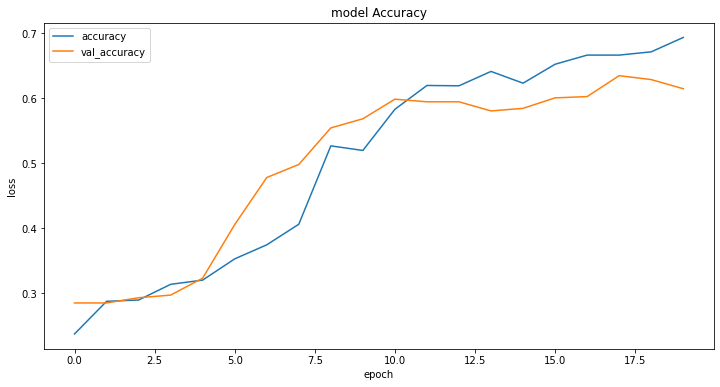

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'],loc = 'upper left')
plt.show

Test

In [23]:
# predictions
predictions = model.predict(X_test)
y_pred = np.array([[False]*9]*len(predictions))
for i, elem in enumerate(predictions.argmax(axis=1)):
  y_pred[i][elem] = True
matrix = np.around(confusion_matrix(y_test_cat.argmax(axis=1), predictions.argmax(axis=1), normalize='pred'),2)

In [24]:
from sklearn.metrics import classification_report
report = classification_report(y_test_cat, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.51      0.52       142
           1       0.51      0.37      0.43       113
           2       0.40      0.18      0.25        22
           3       0.62      0.68      0.65       172
           4       0.45      0.39      0.42        61
           5       0.71      0.64      0.67        69
           6       0.64      0.76      0.69       238
           7       0.67      0.40      0.50         5
           8       0.80      0.89      0.84         9

   micro avg       0.60      0.60      0.60       831
   macro avg       0.59      0.54      0.55       831
weighted avg       0.59      0.60      0.59       831
 samples avg       0.60      0.60      0.60       831



In [25]:
score = accuracy_score(y_test_cat, y_pred)
score

0.5956678700361011

##ResNet CNN

(None, 9)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 598, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 598, 128)     256         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 598, 1)       129         conv1d_5[0][0]                   
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 598)          0           conv1d_6[0][0]                   
__________________________________________________________________________________

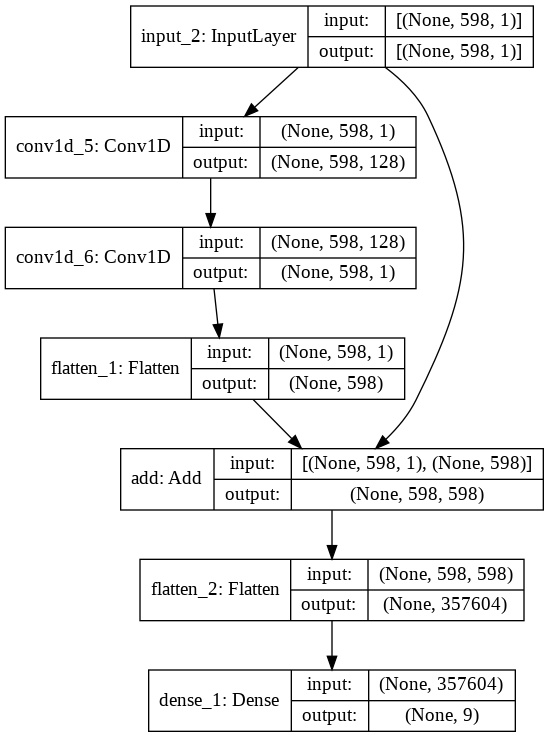

In [26]:
input = Input(shape=(X_train.shape[1], 1)) 
x = SpatialDropout1D(0.2)(input)
x = Conv1D(filters=128, kernel_size=1, activation='relu')(input)
x = Conv1D(filters=1, kernel_size=1, activation='relu')(x)
x = Flatten()(x)
x = Add()([input, x])
tmp = x
for i in range(0):
  x = SpatialDropout1D(0.1)(x)
  x = Conv1D(filters=16, kernel_size=1, activation='relu')(x)
  x = Conv1D(filters=1, kernel_size=1, activation='relu')(x)
  x = Flatten()(x)
  x = Add()([tmp, x])
  tmp = x
x = Flatten()(x)
out = Dense(9, activation='softmax')(x)
print(out.shape)
model = Model(input, out)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

# Trainning

In [27]:
history = model.fit(X_train, y_train_cat, batch_size=140, epochs=20, verbose=1, validation_split=0.2,  callbacks = EarlyStopping( monitor = "val_loss" ,patience=10))  # starts trainin

Epoch 1/20
15/15 [==============================] - 2s 64ms/step - loss: 1.6430 - accuracy: 0.4734 - val_loss: 1.4783 - val_accuracy: 0.5843
Epoch 2/20
15/15 [==============================] - 1s 46ms/step - loss: 0.8363 - accuracy: 0.7219 - val_loss: 1.5717 - val_accuracy: 0.5803
Epoch 3/20
15/15 [==============================] - 1s 46ms/step - loss: 0.7263 - accuracy: 0.7420 - val_loss: 1.6416 - val_accuracy: 0.5924
Epoch 4/20
15/15 [==============================] - 1s 45ms/step - loss: 0.6590 - accuracy: 0.7651 - val_loss: 1.6774 - val_accuracy: 0.5944
Epoch 5/20
15/15 [==============================] - 1s 45ms/step - loss: 0.6648 - accuracy: 0.7656 - val_loss: 1.7138 - val_accuracy: 0.6064
Epoch 6/20
15/15 [==============================] - 1s 46ms/step - loss: 0.6257 - accuracy: 0.7781 - val_loss: 1.8725 - val_accuracy: 0.5904
Epoch 7/20
15/15 [==============================] - 1s 46ms/step - loss: 0.6136 - accuracy: 0.7922 - val_loss: 1.8972 - val_accuracy: 0.6044
Epoch 8/20
15

model accuracy

<function matplotlib.pyplot.show>

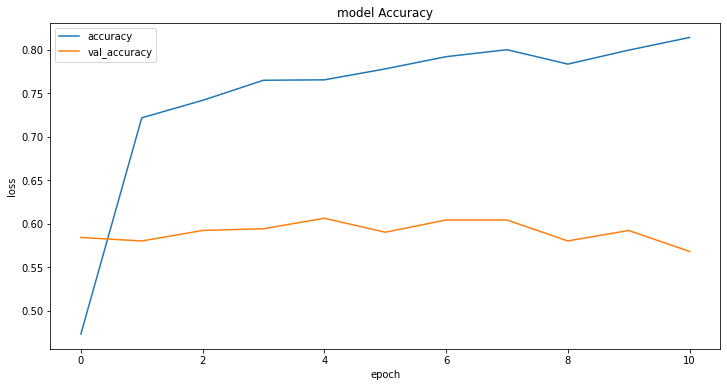

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'],loc = 'upper left')
plt.show

In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_test_cat, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.51      0.52       142
           1       0.51      0.37      0.43       113
           2       0.40      0.18      0.25        22
           3       0.62      0.68      0.65       172
           4       0.45      0.39      0.42        61
           5       0.71      0.64      0.67        69
           6       0.64      0.76      0.69       238
           7       0.67      0.40      0.50         5
           8       0.80      0.89      0.84         9

   micro avg       0.60      0.60      0.60       831
   macro avg       0.59      0.54      0.55       831
weighted avg       0.59      0.60      0.59       831
 samples avg       0.60      0.60      0.60       831



Test

In [30]:
# predictions
predictions = model.predict(X_test)
y_pred = np.array([[False]*9]*len(predictions))
for i, elem in enumerate(predictions.argmax(axis=1)):
  y_pred[i][elem] = True
matrix = np.around(confusion_matrix(y_test_cat.argmax(axis=1), predictions.argmax(axis=1), normalize='pred'),2)

accuracy on test set

In [31]:
score = accuracy_score(y_test_cat, y_pred)
score

0.5968712394705175

recall matrix

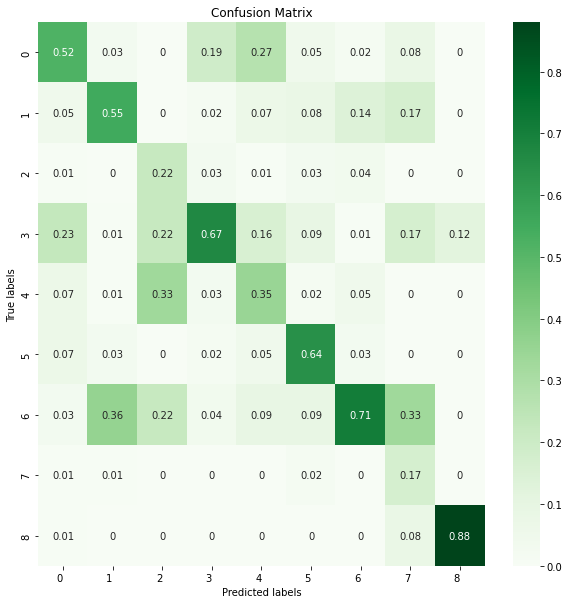

In [32]:
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(matrix, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
plt.setp(ax.get_yticklabels(), horizontalalignment='right')
plt.setp(ax.get_xticklabels(), horizontalalignment='right')     
plt.show()

#SMOTE OVERSAMPLING

In [33]:
smote_over_sample = SMOTE(sampling_strategy='not majority')
labels = df_merge['class'].tolist()
X, y = smote_over_sample.fit_resample(tfIdfMat_reduced, labels)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X, y, stratify=y,random_state=1)   
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(2490, 598)
Test_Set_Size:(831, 598)


Training set oversampled

[]

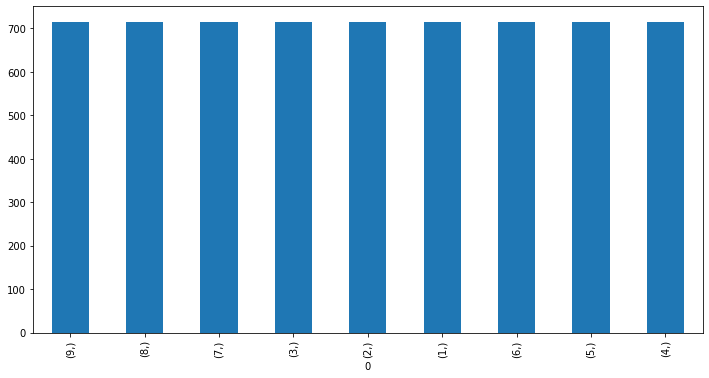

In [34]:
(pd.DataFrame(y_train_res).value_counts(sort=True)).plot(kind='bar')
plt.plot()

Test set's distribution


[]

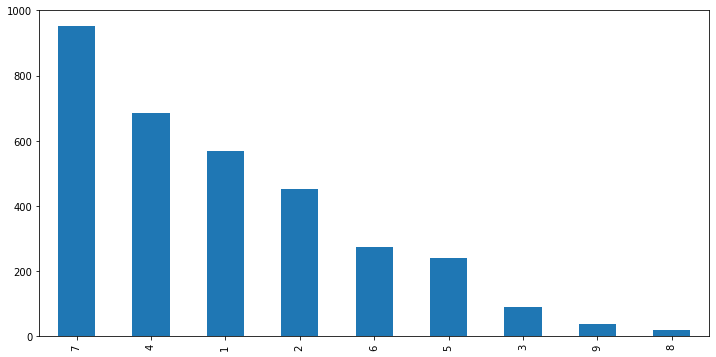

In [35]:
(df_merge['class'].value_counts(sort=True)).plot(kind='bar')
plt.plot()

In [36]:
y_train2_res = [x-1 for x in y_train_res]
y_test2_res = [x-1 for x in y_test_res]
# Categorical
y_train_res_cat = to_categorical(y_train2_res, num_classes=9, dtype ="uint8")
print(y_train_cat[0])
y_test_res_cat = to_categorical(y_test2_res, num_classes=9, dtype ="uint8")

[0 0 0 0 0 1 0 0 0]


##Second CNN model after training test's over sampling

In [37]:
input = Input(shape=(X_train.shape[1], 1)) 
x = SpatialDropout1D(0.1)(input)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)

x = Flatten()(x)
out = Dense(9, activation='softmax')(x)
print(x.shape)
model = Model(input, out)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


(None, 74496)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 598, 1)]          0         
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 598, 1)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 594, 128)          768       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 590, 128)          82048     
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 586, 128)          82048     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 582, 128)          82048     
_________________________________________________________________
flatten_3 (Flatten)          (None, 74496)   

Training


In [38]:
history = model.fit(X_train_res, y_train_res_cat, batch_size=180, epochs=40, verbose=1, validation_split = 0.1,  callbacks = EarlyStopping( monitor = "val_loss",patience=10))  # starts trainin

Epoch 1/40
33/33 [==============================] - 7s 171ms/step - loss: 1.7005 - accuracy: 0.3896 - val_loss: 0.9738 - val_accuracy: 0.6832
Epoch 2/40
33/33 [==============================] - 5s 157ms/step - loss: 0.8438 - accuracy: 0.7070 - val_loss: 0.7084 - val_accuracy: 0.7469
Epoch 3/40
33/33 [==============================] - 5s 157ms/step - loss: 0.6453 - accuracy: 0.7631 - val_loss: 0.5903 - val_accuracy: 0.7873
Epoch 4/40
33/33 [==============================] - 5s 158ms/step - loss: 0.5667 - accuracy: 0.7880 - val_loss: 0.5746 - val_accuracy: 0.8012
Epoch 5/40
33/33 [==============================] - 5s 157ms/step - loss: 0.5295 - accuracy: 0.8089 - val_loss: 0.5805 - val_accuracy: 0.8059
Epoch 6/40
33/33 [==============================] - 5s 157ms/step - loss: 0.4991 - accuracy: 0.8129 - val_loss: 0.5756 - val_accuracy: 0.8075
Epoch 7/40
33/33 [==============================] - 5s 157ms/step - loss: 0.5002 - accuracy: 0.8160 - val_loss: 0.5762 - val_accuracy: 0.8121
Epoch 

Model loss

<function matplotlib.pyplot.show>

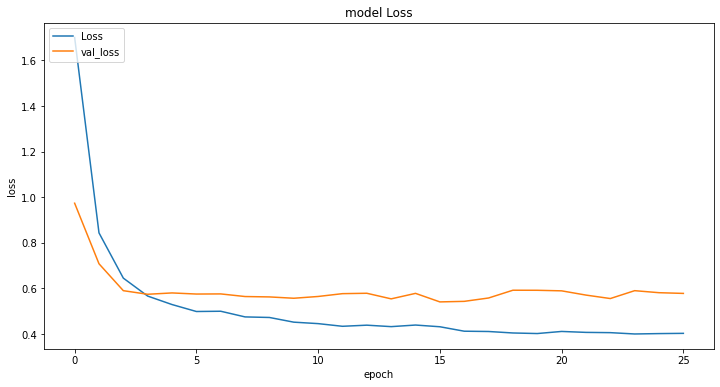

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss','val_loss'],loc = 'upper left')
plt.show

Model accuracy

<function matplotlib.pyplot.show>

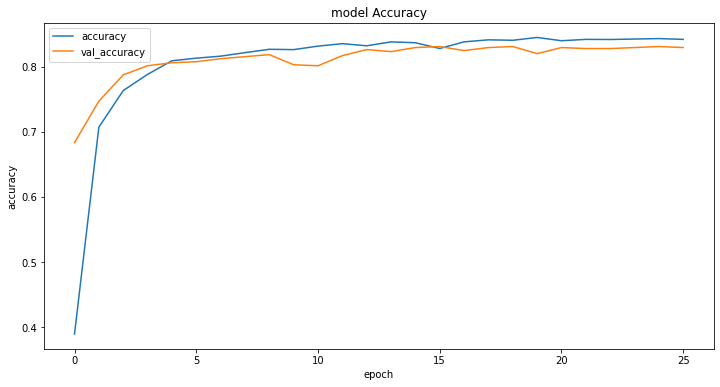

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'],loc = 'upper left')
plt.show

In [42]:
X_test.shape

(831, 598)

Prediction

In [44]:
# predictions
predictions = model.predict(X_test)
y_pred = np.array([[False]*9]*len(predictions))
for i, elem in enumerate(predictions.argmax(axis=1)):
  y_pred[i][elem] = True
matrix = np.around(confusion_matrix(y_test_cat.argmax(axis=1), y_pred.argmax(axis=1), normalize='true'),2)

Recall matrix

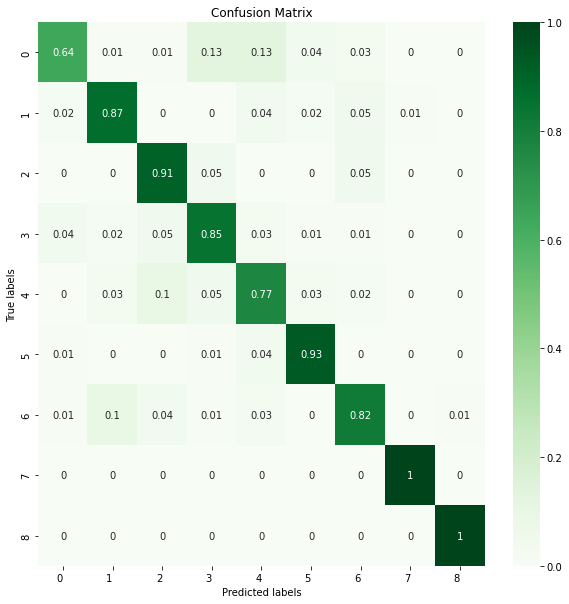

In [45]:
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(matrix, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
plt.setp(ax.get_yticklabels(), horizontalalignment='right')
plt.setp(ax.get_xticklabels(), horizontalalignment='right')     
plt.show()

In [46]:

from sklearn.metrics import classification_report
report = classification_report(y_test_cat, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.64      0.74       142
           1       0.77      0.87      0.81       113
           2       0.44      0.91      0.60        22
           3       0.85      0.85      0.85       172
           4       0.57      0.77      0.65        61
           5       0.84      0.93      0.88        69
           6       0.94      0.82      0.87       238
           7       0.83      1.00      0.91         5
           8       0.82      1.00      0.90         9

   micro avg       0.81      0.81      0.81       831
   macro avg       0.77      0.86      0.80       831
weighted avg       0.84      0.81      0.82       831
 samples avg       0.81      0.81      0.81       831



Accuracy on test set

In [ ]:
accuracy_score(y_test_cat, y_pred)

0.8134777376654633

In [ ]:
score = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.5965111255645752 / Test accuracy: 0.8134777545928955


Cross validation

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

acc_per_fold = []
loss_per_fold = []
nmbr_kfold = 5
# Merge inputs and targets
inputs = np.concatenate((X_train_res, X_test), axis=0)
targets = np.concatenate((y_train_res_cat, y_test_cat), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=nmbr_kfold, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  input = Input(shape=(X_train.shape[1], 1)) 
  x = SpatialDropout1D(0.1)(input)
  x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
  x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
  x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
  x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)
  x = Flatten()(x)
  out = Dense(9, activation='softmax')(x)
  model = Model(input, out)
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=140,
              epochs=5,
              verbose=1)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

print(f'AVG Score of Cross Validation : loss :{sum(acc_per_fold)/nmbr_kfold}; score : {sum(loss_per_fold)/nmbr_kfold} of loss %')

Epoch 1/5
42/42 [==============================] - 2s 35ms/step - loss: 1.5838 - accuracy: 0.4367
Epoch 2/5
42/42 [==============================] - 1s 33ms/step - loss: 0.8025 - accuracy: 0.7150
Epoch 3/5
42/42 [==============================] - 1s 33ms/step - loss: 0.6418 - accuracy: 0.7549
Epoch 4/5
42/42 [==============================] - 1s 33ms/step - loss: 0.5583 - accuracy: 0.7959
Epoch 5/5
42/42 [==============================] - 1s 32ms/step - loss: 0.5241 - accuracy: 0.8064
Score for fold 1: loss of 0.5726855397224426; accuracy of 79.97246980667114%
Epoch 1/5
42/42 [==============================] - 2s 32ms/step - loss: 1.6871 - accuracy: 0.3995
Epoch 2/5
42/42 [==============================] - 1s 32ms/step - loss: 0.9028 - accuracy: 0.6869
Epoch 3/5
42/42 [==============================] - 1s 32ms/step - loss: 0.6607 - accuracy: 0.7537
Epoch 4/5
42/42 [==============================] - 1s 32ms/step - loss: 0.5824 - accuracy: 0.7835
Epoch 5/5
42/42 [========================

#grid search

In [ ]:
def build_model_lr_dropout( dropout_rate=0.1):
    model = Sequential()
    model.add(Input(shape=(598, 1)))
    model.add(SpatialDropout1D(dropout_rate))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(Flatten())
    model.add(Dense(units=9, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
model = KerasClassifier(build_fn=build_model_lr_dropout,
                        epochs=20,
                        validation_split = 0.2,
                        verbose = 2)

batch_size = list(range(100, 220, 20))
dropout_rate = list(np.arange(0.0, 0.35, 0.05))

param_grid = dict(batch_size=batch_size, dropout_rate=dropout_rate)
print(param_grid)
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=2)
X_train_res = X_train_res.reshape(6432, 598, 1)
y_train_res_cat = y_train_res_cat.reshape(6432,  9)
grid_lr_dropout_result = grid.fit(X_train_res, y_train_res_cat)

{'batch_size': [100, 120, 140, 160, 180, 200], 'dropout_rate': [0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004]}


In [ ]:
print(grid_lr_dropout_result.best_params_)
print(grid_lr_dropout_result.best_score_)
means = grid_lr_dropout_result.cv_results_['mean_test_score']
stds = grid_lr_dropout_result.cv_results_['std_test_score']
params = grid_lr_dropout_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
history = model.fit(X_train_res, y_train_res_cat, batch_size=180, epochs=40, verbose=1, validation_split = 0.1,  callbacks = EarlyStopping( monitor = "val_loss",patience=10))  # starts trainin

In [ ]:
grid_lr_dropout_result.best_params_

In [ ]:
means = grid_lr_dropout_result.cv_results_['mean_test_score']
stds = grid_lr_dropout_result.cv_results_['std_test_score']
params = grid_lr_dropout_result.cv_results_['params']


df_1 = pd.DataFrame(params)
df = pd.DataFrame(means.reshape(6, 7))
df.columns = sorted(set(round(df_1['dropout_rate'], 2)))
df.index = sorted(set(df_1['batch_size']))

plt.imshow(df,
           cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(df)), df.columns)
plt.xlabel('Learning rate')
plt.yticks(range(len(df)), df.index)
plt.ylabel('batch_size')
#plt.savefig('pictures/tetra_gridsearch_auc.png')
plt.show()

https://media.discordapp.net/attachments/892699662157484043/903396618286546944/5PjveYi6VA2AAAAAElFTkSuQmCC.png

#Bayesian optimisation

In [47]:
! pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=d97d82402a56e6209cde27c809cba462b619025605cead20b570601d473f5e23
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [49]:
import os
import numpy as np
import pandas as pd
from bayes_opt import BayesianOptimization
from keras.layers import Dense, Conv2D, BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Input, Flatten, Dropout
from keras.layers import Activation
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import sys


model_name =str(np.random.uniform(0,1,))[2:9]
early_stop_epochs = 10
learning_rate_epochs = 5
model = Model(input, out)

def cnn_function(num_cnn_blocks, num_filters, batch_size, kernel_size, drop_out, validation_split):
# variable parameters
  dict_params = {'num_cnn_blocks':int(num_cnn_blocks),
          'num_filters':int(16*num_filters),
          'kernel_size':int(kernel_size),
          'batch_size':int(32*batch_size),
          'drop_out':drop_out, 
          'validation_split':validation_split}

  # start of cnn coding   
  input = Input(shape=(X_train.shape[1], 1)) 
  x = SpatialDropout1D(0.1)(input)
  x = Conv1D(filters=128, kernel_size=5, activation='relu')(x)

  # additional cnn blocks
  for iblock in range(dict_params['num_cnn_blocks'] - 1):
    x = Conv1D(filters=128, kernel_size=5, activation='relu')(x) 
  x = Flatten()(x)
  out = Dense(9, activation='softmax')(x)

  # instantiate and compile model
  cnn_model = Model(inputs=input, outputs=out)
  cnn_model.compile(loss='categorical_crossentropy',
            optimizer='adam', metrics=['accuracy'])
    

  # fit the model
  h = cnn_model.fit(x=X_train_res, y=y_train_res_cat,
            batch_size=dict_params['batch_size'],
            epochs=40,
            validation_split=dict_params['validation_split'],
            callbacks= EarlyStopping( monitor = "val_loss" ,patience=10))
  validation_loss = np.min(h.history['val_loss'])


  # bayes opt is a maximization algorithm, to minimize validation_loss, return 1-this
  bayes_opt_score = 1.0 - validation_loss

  return bayes_opt_score    
# end of cnn_function()

optimizer = BayesianOptimization(f=cnn_function,
                            pbounds={'num_cnn_blocks':(2, 4.001),
                                      'num_filters':(1, 4.001),  # *16
                                      'kernel_size':(2, 5.001),
                                      'batch_size':(1, 5.001),  # *32
                                      'drop_out': (0.05, 0.5),
                                      'validation_split':(0.05, 0.5)},
                                      verbose=2
                                     )

optimizer.maximize(init_points=4, n_iter=20)

print('nbest result:', optimizer.max)

|   iter    |  target   | batch_... | drop_out  | kernel... | num_cn... | num_fi... | valida... |
-------------------------------------------------------------------------------------------------
Epoch 1/40
24/24 [==============================] - 3s 83ms/step - loss: 1.9162 - accuracy: 0.3432 - val_loss: 1.3987 - val_accuracy: 0.5280
Epoch 2/40
24/24 [==============================] - 2s 66ms/step - loss: 1.1413 - accuracy: 0.6211 - val_loss: 0.9356 - val_accuracy: 0.6844
Epoch 3/40
24/24 [==============================] - 2s 66ms/step - loss: 0.8173 - accuracy: 0.7209 - val_loss: 0.7563 - val_accuracy: 0.7433
Epoch 4/40
24/24 [==============================] - 2s 67ms/step - loss: 0.6926 - accuracy: 0.7517 - val_loss: 0.6908 - val_accuracy: 0.7627
Epoch 5/40
24/24 [==============================] - 2s 68ms/step - loss: 0.6085 - accuracy: 0.7712 - val_loss: 0.6490 - val_accuracy: 0.7795
Epoch 6/40
24/24 [==============================] - 2s 67ms/step - loss: 0.5539 - accuracy: 0.7823 

Model with best hyper parameters obtain with the bayesian optimisation

In [50]:
input = Input(shape=(X_train.shape[1], 1)) 
x = SpatialDropout1D(0.1)(input)
x = Conv1D(filters=64, kernel_size=5, activation='relu')(x)
x = Conv1D(filters=64, kernel_size=5, activation='relu')(x)
x = Conv1D(filters=64, kernel_size=5, activation='relu')(x)
x = Conv1D(filters=64, kernel_size=5, activation='relu')(x)

x = Flatten()(x)
out = Dense(9, activation='softmax')(x)
model = Model(input, out)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 598, 1)]          0         
_________________________________________________________________
spatial_dropout1d_28 (Spatia (None, 598, 1)            0         
_________________________________________________________________
conv1d_88 (Conv1D)           (None, 594, 64)           384       
_________________________________________________________________
conv1d_89 (Conv1D)           (None, 590, 64)           20544     
_________________________________________________________________
conv1d_90 (Conv1D)           (None, 586, 64)           20544     
_________________________________________________________________
conv1d_91 (Conv1D)           (None, 582, 64)           20544     
_________________________________________________________________
flatten_29 (Flatten)         (None, 37248)             0  

##Training

In [51]:
history = model.fit(X_train_res, y_train_res_cat, batch_size=32, epochs=40, verbose=1, 
                    validation_split = 0.05,  callbacks = EarlyStopping( monitor = 'val_loss', patience=10))

Epoch 1/40
191/191 [==============================] - 5s 20ms/step - loss: 1.3415 - accuracy: 0.5250 - val_loss: 0.7730 - val_accuracy: 0.7143
Epoch 2/40
191/191 [==============================] - 3s 15ms/step - loss: 0.7324 - accuracy: 0.7349 - val_loss: 0.7167 - val_accuracy: 0.7609
Epoch 3/40
191/191 [==============================] - 3s 15ms/step - loss: 0.5902 - accuracy: 0.7818 - val_loss: 0.5959 - val_accuracy: 0.8012
Epoch 4/40
191/191 [==============================] - 3s 16ms/step - loss: 0.5455 - accuracy: 0.7974 - val_loss: 0.6140 - val_accuracy: 0.8106
Epoch 5/40
191/191 [==============================] - 3s 15ms/step - loss: 0.5075 - accuracy: 0.8088 - val_loss: 0.6184 - val_accuracy: 0.8168
Epoch 6/40
191/191 [==============================] - 3s 16ms/step - loss: 0.5033 - accuracy: 0.8092 - val_loss: 0.5696 - val_accuracy: 0.7981
Epoch 7/40
191/191 [==============================] - 3s 16ms/step - loss: 0.4733 - accuracy: 0.8239 - val_loss: 0.5843 - val_accuracy: 0.7826

In [52]:
predictions = model.predict(X_test)
y_pred = np.array([[False]*9]*len(predictions))
for i, elem in enumerate(predictions.argmax(axis=1)):
  y_pred[i][elem] = True
matrix = np.around(confusion_matrix(y_test_cat.argmax(axis=1), y_pred.argmax(axis=1), normalize='true'),2)

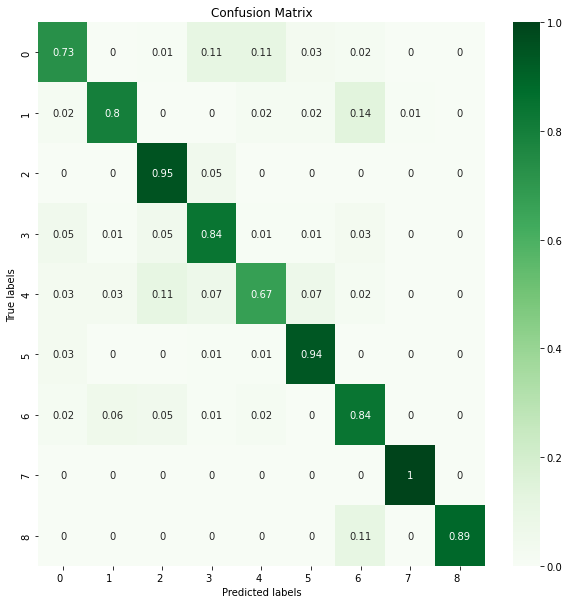

In [53]:
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(matrix, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
plt.setp(ax.get_yticklabels(), horizontalalignment='right')
plt.setp(ax.get_xticklabels(), horizontalalignment='right')     
plt.show()

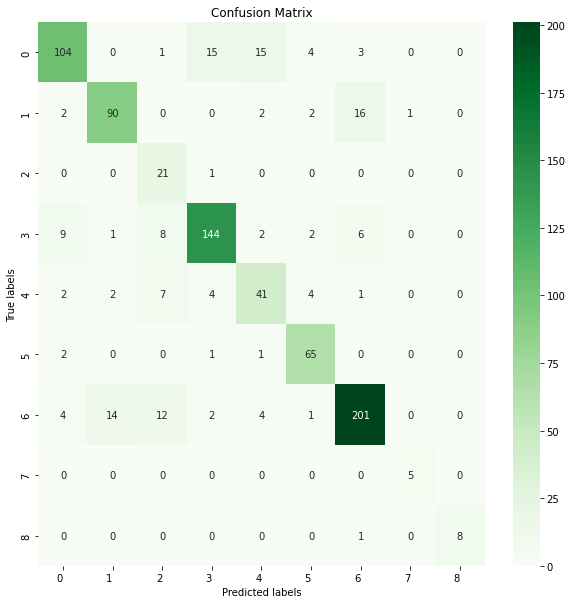

In [54]:
matrix = confusion_matrix(y_test_cat.argmax(axis=1), y_pred.argmax(axis=1))
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(matrix, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
plt.setp(ax.get_yticklabels(), horizontalalignment='right')
plt.setp(ax.get_xticklabels(), horizontalalignment='right')     
plt.show()

In [55]:
accuracy_score(y_test_cat, y_pred)

0.8170878459687124

In [56]:
from sklearn.metrics import classification_report
report = classification_report(y_test_cat, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       142
           1       0.84      0.80      0.82       113
           2       0.43      0.95      0.59        22
           3       0.86      0.84      0.85       172
           4       0.63      0.67      0.65        61
           5       0.83      0.94      0.88        69
           6       0.88      0.84      0.86       238
           7       0.83      1.00      0.91         5
           8       1.00      0.89      0.94         9

   micro avg       0.82      0.82      0.82       831
   macro avg       0.80      0.85      0.81       831
weighted avg       0.83      0.82      0.82       831
 samples avg       0.82      0.82      0.82       831



#ResNET

In [63]:
input = Input(shape=(X_train.shape[1], 1)) 
tmp = input
x = SpatialDropout1D(0.2)(input)
x = Conv1D(filters=128, kernel_size=1, activation='relu')(input)
x = Conv1D(filters=1, kernel_size=1, activation='relu')(x)
x = Flatten()(x)
x = Add()([input, x])

for i in range(3):
  x = SpatialDropout1D(0.1)(x)
  x = Conv1D(filters=128, kernel_size=1, activation='relu')(x)
  x = Conv1D(filters=1, kernel_size=1, activation='relu')(x)
  x = Flatten()(x)
  x = Add()([tmp, x])
  if i%2 == 0:
    tmp = x
x = Flatten()(x)
out = Dense(9, activation='softmax')(x)
print(out.shape)
model = Model(input, out)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

(None, 9)
Model: "model_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 598, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_100 (Conv1D)             (None, 598, 128)     256         input_31[0][0]                   
__________________________________________________________________________________________________
conv1d_101 (Conv1D)             (None, 598, 1)       129         conv1d_100[0][0]                 
__________________________________________________________________________________________________
flatten_35 (Flatten)            (None, 598)          0           conv1d_101[0][0]                 
_________________________________________________________________________________

In [67]:
history = model.fit(X_train_res, y_train_res_cat, batch_size=300, epochs=100, verbose=1, validation_split = 0.2,  callbacks = EarlyStopping( monitor = "val_loss",patience=10))  # starts trainin

Epoch 1/100
18/18 [==============================] - 12s 576ms/step - loss: 1.9700 - accuracy: 0.5569 - val_loss: 0.8480 - val_accuracy: 0.7304
Epoch 2/100
18/18 [==============================] - 10s 556ms/step - loss: 0.6561 - accuracy: 0.7757 - val_loss: 0.7458 - val_accuracy: 0.7568
Epoch 3/100
18/18 [==============================] - 10s 556ms/step - loss: 0.5496 - accuracy: 0.8002 - val_loss: 0.7078 - val_accuracy: 0.7863
Epoch 4/100
18/18 [==============================] - 10s 557ms/step - loss: 0.5030 - accuracy: 0.8266 - val_loss: 0.6922 - val_accuracy: 0.7747
Epoch 5/100
18/18 [==============================] - 10s 557ms/step - loss: 0.4662 - accuracy: 0.8293 - val_loss: 0.7172 - val_accuracy: 0.7855
Epoch 6/100
18/18 [==============================] - 10s 556ms/step - loss: 0.4633 - accuracy: 0.8342 - val_loss: 0.7328 - val_accuracy: 0.7747
Epoch 7/100
18/18 [==============================] - 10s 556ms/step - loss: 0.4502 - accuracy: 0.8439 - val_loss: 0.7342 - val_accuracy:

Model accuracy

<function matplotlib.pyplot.show>

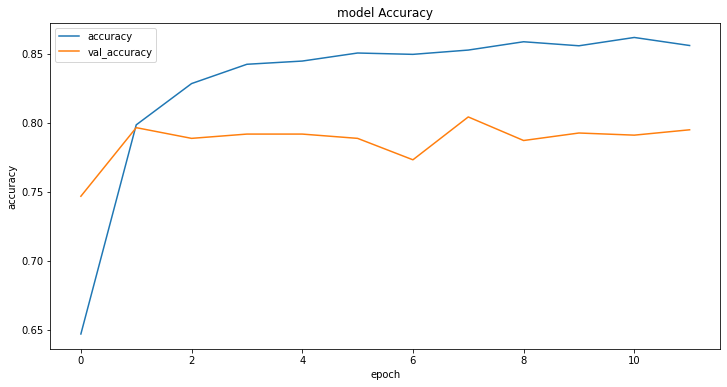

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'],loc = 'upper left')
plt.show

Test

In [68]:
predictions = model.predict(X_test)
y_pred = np.array([[False]*9]*len(predictions))
for i, elem in enumerate(predictions.argmax(axis=1)):
  y_pred[i][elem] = True
matrix = np.around(confusion_matrix(y_test_cat.argmax(axis=1), y_pred.argmax(axis=1), normalize='true'),2)

In [69]:
accuracy_score(y_test_cat, y_pred)

0.7436823104693141

In [70]:

from sklearn.metrics import classification_report
report = classification_report(y_test_cat, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.64      0.69       142
           1       0.68      0.76      0.72       113
           2       0.42      0.82      0.55        22
           3       0.86      0.76      0.81       172
           4       0.48      0.75      0.59        61
           5       0.79      0.84      0.82        69
           6       0.88      0.73      0.80       238
           7       0.50      1.00      0.67         5
           8       0.69      1.00      0.82         9

   micro avg       0.74      0.74      0.74       831
   macro avg       0.67      0.81      0.72       831
weighted avg       0.77      0.74      0.75       831
 samples avg       0.74      0.74      0.74       831

